<a href="https://colab.research.google.com/github/RandivCosta/data-analysis/blob/main/Comparative_mann_whitney_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparative analysis

###comparative analysis of bc between sand and seawater

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
import seaborn as sns
from itertools import combinations
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('adjusted_data.csv')
seawater = df[df['Area'] == 'Sea Water']
sand = df[df['Area'] == 'Sand']
bacterial_names = df.columns[df.columns.str.contains('BC-')].tolist()

### non-parametric test (Mann-Whitney U test ) to determine significant difference for 3 bacterial varieties
 Compares two independent groups\
 null hypothesis (H₀): no difference in bacterial counts between seawater and sand.\
 alternative hypothesis (H₁): there is a difference.\
 if p-value < 0.05, reject H₀ (significant difference).\
 If p-value ≥ 0.05, fail to reject H₀ (no significant difference).

In [ ]:
# perform the test for each bacteria
for bacteria in bacterial_names:
    # extract counts for seawater and sand (forming 2 groups)
    seawater_counts = seawater[bacteria]
    sand_counts = sand[bacteria]

    stat, p_value = mannwhitneyu(seawater_counts, sand_counts, alternative='two-sided')

    #interpreting results
    print(f"--- {bacteria} ---")
    print(f"Mann-Whitney U Statistic: {stat}")
    print(f"P-value: {p_value}")
    # validating the null hypothesis
    if p_value < 0.05:
        print("There is a Significant difference (p < 0.05)")
    else:
        print("No significant difference (p ≥ 0.05)")
    print()

--- BC-Enterococcus (CFU/100ml) ---
Mann-Whitney U Statistic: 263.0
P-value: 0.005813838688591844
There is a Significant difference (p < 0.05)

--- BC-Fecal Coliform(CFU/100ml) ---
Mann-Whitney U Statistic: 350.5
P-value: 0.1432595903418256
No significant difference (p ≥ 0.05)

--- BC-E-Coli (CFU/100ml) ---
Mann-Whitney U Statistic: 387.5
P-value: 0.3591472765455258
No significant difference (p ≥ 0.05)



### visualizing test results

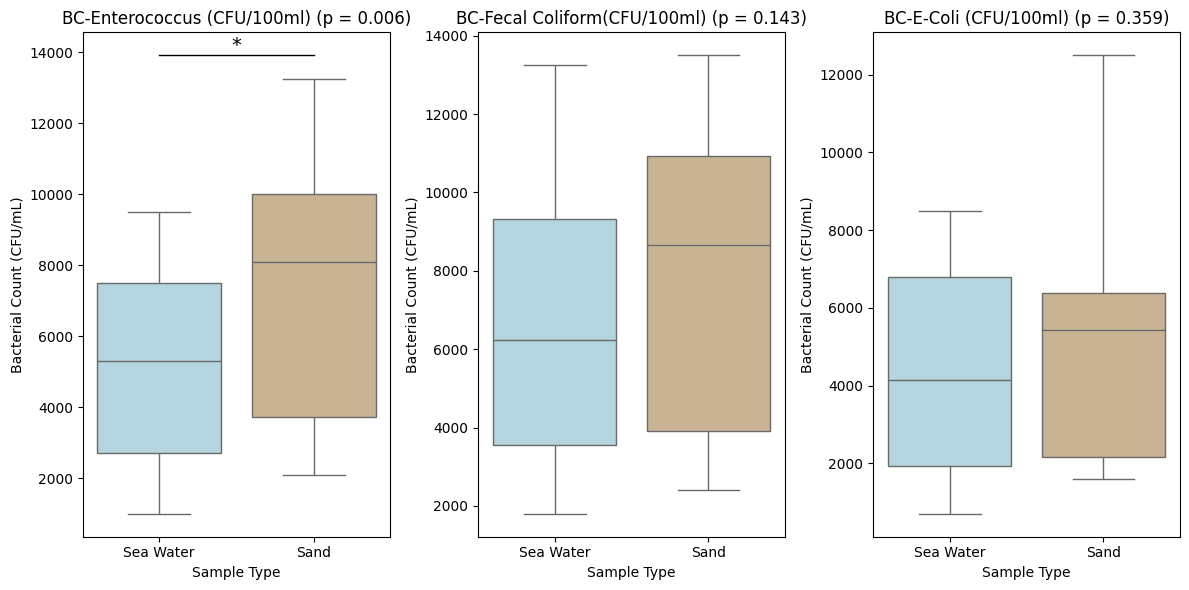

In [ ]:
plt.figure(figsize=(12, 6))

for i, bacteria in enumerate(bacterial_names, 1):
    ax = plt.subplot(1, 3, i)
    sns.boxplot(
        x='Area',
        y=bacteria,
        hue='Area',
        data=df,
        palette={'Sea Water': 'lightblue', 'Sand': 'tan'},
        legend=False
    )

    stat, p_value = mannwhitneyu(seawater[bacteria], sand[bacteria])

    # add significance marker if p < 0.05
    if p_value < 0.05:
        # draw a line and add *
        plt.plot([0, 1], [max(df[bacteria]) * 1.05] * 2, color='black', lw=1)
        plt.text(0.5, max(df[bacteria]) * 1.05, '*', ha='center', va='bottom', color='black', fontsize=14)

    plt.title(f'{bacteria} (p = {p_value:.3f})')
    plt.xlabel('Sample Type')
    plt.ylabel('Bacterial Count (CFU/mL)')

plt.tight_layout()
plt.show()
# plt.savefig(f'Mann_Whitney_test_boxplots.png', dpi=300, bbox_inches='tight')
# plt.close()